### Bước 1: Cài đặt các thư viện cần thiết

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders

### Bước 2: Đặt đường dẫn home chứa folder project hiện tại

In [4]:
import platform

if platform.system() == 'Linux':
    home_dir = '/content/drive/MyDrive/ClassificationofMangoDiseases'
elif platform.system() == 'Windows':
    home_dir = 'D:\Projects\ClassificationofMangoDiseases'
else:
    raise ValueError('Unsupported platform')

print(f'Home directory: {home_dir}')

Home directory: D:\Projects\ClassificationofMangoDiseases


### Bước 3: Kết nối với Google Drive nếu đang chạy trên Google Colab

In [5]:
if platform.system() == 'Linux':
    from google.colab import drive
    drive.mount('/content/drive')

### Bước 4: Đặt đường dẫn tới tập dữ liệu

In [6]:
# Đường dẫn tới tập dữ liệu đã chọn (gốc hoặc đã remove background)
data_dir = os.path.join(home_dir, 'data/MangoFruitDDS/SenMangoFruitDDS_bgremoved')  # Hoặc 'SenMangoFruitDDS_original'
output_dir = os.path.join(home_dir, 'data/processed')

print(f'Data directory: {data_dir}')
print(f'Output directory: {output_dir}')

Data directory: D:\Projects\ClassificationofMangoDiseases\data/MangoFruitDDS/SenMangoFruitDDS_bgremoved
Output directory: D:\Projects\ClassificationofMangoDiseases\data/processed


### Bước 5: Tiền xử lý dữ liệu và phân chia tập dữ liệu

Sử dụng thư viện `split-folders` để phân chia tập dữ liệu thành các tập `train`, `valid`, và `test`.

In [7]:
# Xóa thư mục đầu ra nếu đã tồn tại
if os.path.exists(output_dir):
    import shutil
    shutil.rmtree(output_dir)

# Phân chia dữ liệu
splitfolders.ratio(data_dir, output=output_dir, seed=42, ratio=(.7, .2, .1), group_prefix=None)

### Bước 6: Hiển thị thông tin thư mục sau khi phân chia

In [8]:
# Kiểm tra các thư mục sau khi phân chia
for root, dirs, files in os.walk(output_dir):
    level = root.replace(output_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print('{}{}'.format(subindent, f))

processed/
    test/
        Alternaria/
            Alternaria_011.jpg
            Alternaria_012.jpg
            Alternaria_013.jpg
            Alternaria_027.jpg
            Alternaria_028.jpg
            Alternaria_031.jpg
            Alternaria_033.jpg
            Alternaria_040.jpg
            Alternaria_060.jpg
            Alternaria_062.jpg
            Alternaria_064.jpg
            Alternaria_067.jpg
            Alternaria_075.jpg
            Alternaria_113.jpg
            Alternaria_144.jpg
            Alternaria_156.jpg
            Alternaria_168.jpg
        Anthracnose/
            Anthracnose_008.jpg
            Anthracnose_013.jpg
            Anthracnose_015.jpg
            Anthracnose_019.jpg
            Anthracnose_030.jpg
            Anthracnose_033.jpg
            Anthracnose_037.jpg
            Anthracnose_071.jpg
            Anthracnose_088.jpg
            Anthracnose_096.jpg
            Anthracnose_116.jpg
            Anthracnose_123.jpg
            Anthracnose_128

### Bước 7: Xác nhận kết quả

Kiểm tra lại thư mục đã được phân chia đúng cách.

Classes: ['Alternaria', 'Anthracnose', 'Black Mould Rot', 'Healthy', 'Stem and Rot']
Random class: Alternaria
Random image path: D:\Projects\ClassificationofMangoDiseases\data/processed\train\Alternaria\Alternaria_164.jpg


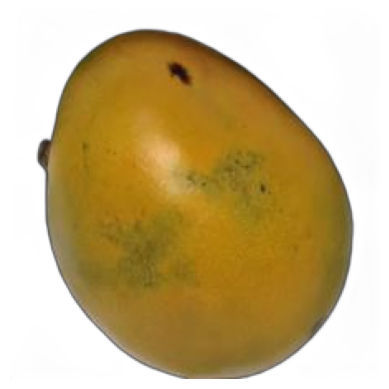

In [12]:
import matplotlib.pyplot as plt
import random
from PIL import Image

# Hiển thị một số hình ảnh từ tập train
train_dir = os.path.join(output_dir, 'train')
class_names = os.listdir(train_dir)
print(f'Classes: {class_names}')

# Chọn ngẫu nhiên một lớp
random_class = random.choice(class_names)
print(f'Random class: {random_class}')

# Chọn ngẫu nhiên một hình ảnh từ lớp đó
random_image_path = os.path.join(train_dir, random_class, random.choice(os.listdir(os.path.join(train_dir, random_class))))
print(f'Random image path: {random_image_path}')

# Hiển thị hình ảnh
image = Image.open(random_image_path)
plt.imshow(image)
plt.axis('off')
plt.show()